In [1]:
import pickle
import pandas as pd
import os 
import matplotlib.pyplot as plt
import re
import shap
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit 
from xgboost import XGBClassifier, XGBRegressor
from sklearn import metrics
import numpy as np
# import shap values and explainer

cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France','Germany','Madrid_Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany','Spain_Austria','France','Germany']



pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Wien Austria


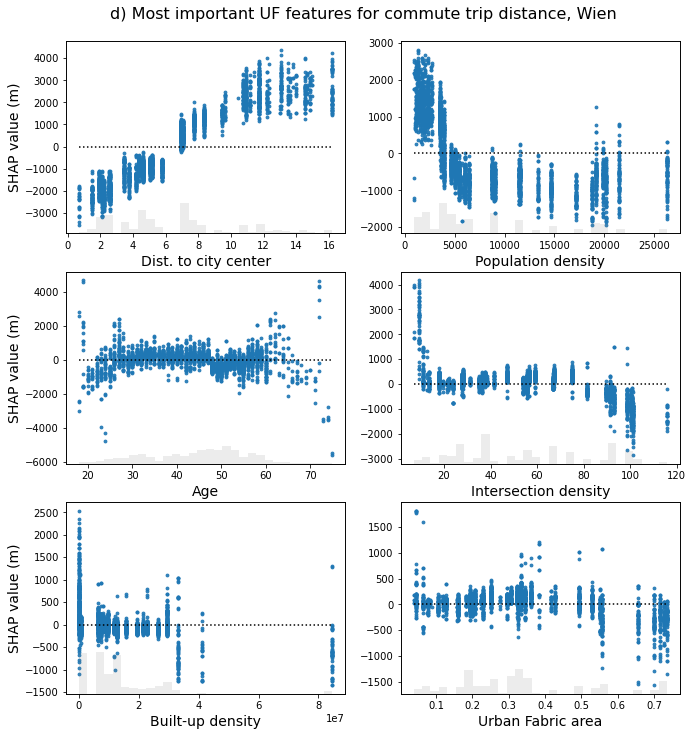

In [7]:
city='Wien'

country=countries[cities_all.index(city)]
print(city, country)
if city=='Germany_other':
    city0='Dresden'
    df0=pd.read_csv('../outputs/Combined/' + city0 + '_UF.csv')
    df0.loc[(df0['Training'].isin(['Apprenticeship/Business','Craftsman/Technical'])) & (df0['Education']!='University'),'Education']='Apprenticeship'
    df0=df0.loc[:,['HH_P_WNR','HH_PNR', 'HHNR','Ori_geocode', 'Des_geocode','Res_geocode', 
                'Trip_Time', 'Season','Trip_Purpose_Agg','HHSize',
                'Sex', 'Occupation', 'Education','Age',
                #'PopDensity_res','BuildDensity_res',
                'UrbPopDensity_res', 'UrbBuildDensity_res','DistSubcenter_res', 'DistCenter_res',
                'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                'LU_Comm_res' ,'Trip_Distance']]
    df0['City']=city0
    df_all=df0.copy()

    cities0=['Leipzig','Magdeburg','Potsdam','Frankfurt am Main','Düsseldorf','Kassel']
    for city1 in cities0:
            print(city1)
            df1=pd.read_csv('../outputs/Combined/' + city1 + '_UF.csv')
            df1.loc[(df1['Training'].isin(['Apprenticeship/Business','Craftsman/Technical'])) & (df1['Education']!='University'),'Education']='Apprenticeship'
            df1=df1.loc[:,['HH_P_WNR','HH_PNR', 'HHNR','Ori_geocode', 'Des_geocode','Res_geocode', 
                        'Trip_Time', 'Season','Trip_Purpose_Agg','HHSize',
                        'Sex', 'Occupation', 'Education','Age',
                        #'PopDensity_res','BuildDensity_res',
                        'UrbPopDensity_res', 'UrbBuildDensity_res','DistSubcenter_res', 'DistCenter_res',
                        'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                        'LU_Comm_res','Trip_Distance']]
            df1['City']=city1
            if len(df1.columns==df_all.columns):
                    df_all=pd.concat([df_all,df1])
                    print(city1, 'added.')
                    #print(len(df_all), 'rows in the combined dataframe')
    df_all['HHNR']=df_all['City']+'_'+df_all['HHNR'].astype(int).astype(str)
    df_all['HH_PNR']=df_all['City']+'_'+df_all['HH_PNR'].astype(int).astype(str)
    df_all['HH_P_WNR']=df_all['City']+'_'+df_all['HH_P_WNR'].astype(str)
    df_all.drop(columns='City',inplace=True)
    df_UF=df_all.copy()
elif city=='France_other':
    city0='Clermont'
    df0=pd.read_csv('../outputs/Combined/' + city0 + '_UF.csv')
    df0=df0.loc[:,['HH_P_WNR','HH_PNR', 'HHNR','Ori_geocode', 'Des_geocode','Res_geocode', 
                'Trip_Time', 'Season','Trip_Purpose_Agg','HHSize',
                'Sex', 'Occupation', 'Education','Age',
                #'PopDensity_res','BuildDensity_res',
                'UrbPopDensity_res', 'UrbBuildDensity_res','DistSubcenter_res', 'DistCenter_res',
                'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                'LU_Comm_res', 'Trip_Distance']]
    df0['City']=city0
    df_all=df0.copy()

    cities0=['Toulouse','Montpellier','Lyon','Nantes','Nimes','Lille','Dijon']
    for city1 in cities0:
            print(city1)
            df1=pd.read_csv('../outputs/Combined/' + city1 + '_UF.csv')
            df1=df1.loc[:,['HH_P_WNR','HH_PNR', 'HHNR','Ori_geocode', 'Des_geocode','Res_geocode', 
                        'Trip_Time', 'Season','Trip_Purpose_Agg','HHSize',
                        'Sex', 'Occupation', 'Education','Age',
                        #'PopDensity_res','BuildDensity_res',
                        'UrbPopDensity_res', 'UrbBuildDensity_res','DistSubcenter_res', 'DistCenter_res',
                        'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                        'LU_Comm_res', 'Trip_Distance']]
            df1['City']=city1
            if len(df1.columns==df_all.columns):
                    df_all=pd.concat([df_all,df1])
                    print(city1, 'added.')
                    #print(len(df_all), 'rows in the combined dataframe')
    df_all['HHNR']=df_all['City']+'_'+df_all['HHNR'].astype(int).astype(str)
    df_all['HH_PNR']=df_all['City']+'_'+df_all['HH_PNR'].astype(int).astype(str)
    df_all['HH_P_WNR']=df_all['City']+'_'+df_all['HH_P_WNR'].astype(str)
    df_all.drop(columns='City',inplace=True)
    df_UF=df_all.copy()
else:
        df=pd.read_csv('../outputs/Combined/' + city + '_UF.csv',dtype={'Ori_geocode': str, 'Des_geocode': str,'Res_geocode': str })
        if country=='Germany':
            df.loc[(df['Training'].isin(['Apprenticeship/Business','Craftsman/Technical'])) & (df['Education']!='University'),'Education']='Apprenticeship'
        df_UF=df.loc[:,['HH_P_WNR','HH_PNR', 'HHNR','Ori_geocode', 'Des_geocode','Res_geocode', 
                        'Trip_Time', 'Season','Trip_Purpose_Agg','HHSize',
                        'Sex', 'Occupation', 'Education','Age',
                        #'PopDensity_res','BuildDensity_res',
                        'UrbPopDensity_res', 'UrbBuildDensity_res','DistSubcenter_res', 'DistCenter_res',
                        'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                        'LU_Comm_res', 'Trip_Distance']]
# restrict to trips between home and work (commuting trips)        
df_UF=df_UF.loc[df_UF['Trip_Purpose_Agg']=='Home↔Work',]
df_UF.drop(columns='Trip_Purpose_Agg',inplace=True)
# restrict to those in employment
df_UF=df_UF.loc[df_UF['Occupation'].isin(['Trainee','Employed_FullTime','Employed_PartTime','Employed']),]
#     df_UF.loc[df_UF['Education'].isin(['No diploma yet','Other','Apprenticeship','Unknown']),'Education']='Unknown/Other'
#     df_UF.loc[df_UF['Education'].isin(['Secondary+BAC','Secondary+Matura']),'Education']='Secondary'
Edu_dict={'University':'University','Secondary':'Secondary','Secondary+BAC':'Secondary','Secondary+Matura':'Secondary',
        'Apprenticeship':'Apprenticeship',
        'Elementary':'Primary/None','Pre-School':'Primary/None','No diploma yet':'Primary/None','Unknown':'Primary/None','Other':'Primary/None'}

df_UF['Education']=df_UF['Education'].map(Edu_dict)
#     if city=='Clermont':
#           df_UF=df_UF.loc[df_UF['Education']!='Unknown/Other',]
if city in ['Clermont','Nimes']:
        df_UF.loc[df_UF['Education']=='Apprenticeship','Education']='Secondary'

df=df_UF.dropna()
df['Sex']=df['Sex']-1 # change from [1,2] to [0,1], for plotting purposes
df=df.loc[df['UrbBuildDensity_res']<1e8,]   # remove high building density outliers (For Leipzig)

# identify the feature columns
N_non_feature=6 # how many non-features are at the start of the df
cols=df.columns
newcols=(df.columns[:N_non_feature].tolist()) + ('FeatureD' +'_'+ cols[N_non_feature:-1]).tolist() + (df.columns[-1:].tolist())
# change column names
df.set_axis(newcols,axis=1,inplace=True)
df = df.reset_index(drop=True)
df0=df.copy()

# convert  all categorical variables to dummies
df_Cat=df.select_dtypes('object')[[col for col in df.select_dtypes('object').columns if "FeatureD" in col]]
for col in df_Cat:
    dum=pd.get_dummies(df[[col]])
    df = pd.concat([df, dum], axis = 1)
    # remove the original categorical columns
df.drop(df_Cat.columns.tolist(),axis=1,inplace=True)
# HPO with full dataset, grouping by individual person
target = 'Trip_Distance'
N=len(df)

df_agg=df.copy()


fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance_df=pickle.load(f)
    
target='Trip_Distance'

n=importance_df.loc[importance_df['column_name'].isin(['DistCenter_res','DistSubcenter_res','UrbBuildDensity_res','IntersecDensity_res','UrbPopDensity_res','street_length_res','LU_Comm_res','LU_UrbFab_res','Age'])].index
X=df[[col for col in df.columns if "FeatureD" in col]]
X.sort_index(inplace=True)
data=X.sort_index().iloc[:,n]
data.columns=data.columns.str.replace("FeatureD_", "")
values=shap_values.sort_index().iloc[:,n]
#X_disp=[re.sub('FeatureD_','', x) for x in X.sort_index().columns]
col_dict= {'DistCenter_res':'Dist. to city center','DistSubcenter_res':'Dist. to subenter', 'UrbPopDensity_res':'Population density','UrbBuildDensity_res':'Built-up density',
    'IntersecDensity_res':'Intersection density','LU_Comm_res':'Commercial area','LU_UrbFab_res':'Urban Fabric area','street_length_res':'Avg. street length','bike_lane_share_res':'Cycle lanes',
    'Trip_Time_Evening':'Evening trip','Trip_Time_AM_Rush':'Morning trip','Trip_Time_Nighttime Off-Peak':'Nighttime trip','Trip_Time_Lunch':'Lunchtime trip',
    'Season_Winter':'Winter season',
    'Age':'Age','Sex':'Sex','HHSize':'Household size',
    'Education_University':'University education', 'Occupation_Employed_FullTime':'Employed'}
data.rename(columns=col_dict,inplace=True)


if city == 'Berlin': let='a'
if city == 'Paris': let='b'
if city == 'Madrid': let='c'
if city == 'Wien': let='d'
if city == 'Germany_other': let='e'
if city == 'France_other': let='f'
if city == 'All': let='g'

xl=[]
yl=[]
y0=[]

for i in range(len(n)):
        dftemp=pd.DataFrame({'d':data.iloc[:,i],'v':values.iloc[:,i]})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xl.append(dftemp['d'].values)
        yl.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values)

fig = plt.figure(figsize=(11,12))
for i in range(0,6):
        ax1 = fig.add_subplot(321+i)
        xs=data.iloc[:,i]
        ys=values.iloc[:,i]
        x=xl[i]
        y1=y0[i]
        y2=yl[i]
        xlab=data.columns[i]

        #ax1.scatter(xs+np.random.normal(0, 0.05, len(data)),ys,alpha=0.9,s=8)
        ax1.scatter(xs,ys,alpha=0.9,s=8)
        plt.plot(x,y1,'k:',label='zero')
        if (xlab== 'Built-up density') & (city == 'Germany_other'):
                plt.xlim([0, 2e7])
        if i%2==0:
                ax1.set_ylabel('SHAP value (m)',size=14)
        else:
                ax1.set_ylabel('')
        ax1.set_xlabel(xlab,size=14)

        ax2 = ax1.twinx() 
        if len(xs.unique())==2:
                ax2.hist(xs,bins=[-0.5,0.5,1.5], align='mid',color='gray',alpha=0.25)
                ax2.set_xticks([-.5,0,0.5,1,1.5])
        else:
                ax2.hist(xs,bins=30,color='gray',alpha=0.15)
                ax2.set_ylim(0,len(data))
        ax2.set_yticks([])
plt.suptitle(let + ') ' +  "Most important UF features for commute trip distance, " + city.replace('_',', '),y=0.92,size=16)
plt.savefig('../outputs/ML_Results/result_figures/dist_commute/' + city + '_mainUF.png',facecolor='w',dpi=65,bbox_inches='tight')